In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Abrir, particionar y poner nombre a columnas del set de datos

In [31]:
data = pd.read_csv('HIGGS.csv.gz', nrows=2000000, compression='gzip', header=None, sep=',')

new_column_names = ["signal",
                    "lepton pT",
                    "lepton eta", 
                    "lepton phi", 
                    "missing energy magnitude", 
                    "missing energy phi", 
                    "jet 1 pt", 
                    "jet 1 eta", 
                    "jet 1 phi", 
                    "jet 1 b-tag", 
                    "jet 2 pt", 
                    "jet 2 eta", 
                    "jet 2 phi", 
                    "jet 2 b-tag", 
                    "jet 3 pt", 
                    "jet 3 eta", 
                    "jet 3 phi", 
                    "jet 3 b-tag",
                    "jet 4 pt", 
                    "jet 4 eta", 
                    "jet 4 phi", 
                    "jet 4 b-tag", 
                    "m_jj", 
                    "m_jjj", 
                    "m_lv", 
                    "m_jlv", 
                    "m_bb", 
                    "m_wbb", 
                    "m_wwbb"]
data.columns = new_column_names
print(data.columns)


Index(['signal', 'lepton pT', 'lepton eta', 'lepton phi',
       'missing energy magnitude', 'missing energy phi', 'jet 1 pt',
       'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt', 'jet 2 eta',
       'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi',
       'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')


In [32]:
# Guardar los 2 millones de datos en un nuevo archivo csv
data.to_csv('HIGGS_2M.csv', index=True)

# Revisar si los datos están completos

In [33]:
# Revisamos que no haya datos nulos en ninguna de las columnas
vacios = data.isnull().sum()

for i in range(len(vacios)):
    print("{}: {}".format(new_column_names[i], vacios[i]))

signal: 0
lepton pT: 0
lepton eta: 0
lepton phi: 0
missing energy magnitude: 0
missing energy phi: 0
jet 1 pt: 0
jet 1 eta: 0
jet 1 phi: 0
jet 1 b-tag: 0
jet 2 pt: 0
jet 2 eta: 0
jet 2 phi: 0
jet 2 b-tag: 0
jet 3 pt: 0
jet 3 eta: 0
jet 3 phi: 0
jet 3 b-tag: 0
jet 4 pt: 0
jet 4 eta: 0
jet 4 phi: 0
jet 4 b-tag: 0
m_jj: 0
m_jjj: 0
m_lv: 0
m_jlv: 0
m_bb: 0
m_wbb: 0
m_wwbb: 0


/tmp/ipykernel_40361/986726471.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{}: {}".format(new_column_names[i], vacios[i]))


# Distribución de los datos

In [34]:
data.shape

(2000000, 29)

In [35]:
data.head(10)

,signal,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487
5,0.0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818
6,1.0,0.409391,-1.884684,-1.027292,1.672452,-1.604598,1.338015,0.055427,0.013466,2.173076,...,0.069496,1.377130,3.101961,0.869418,1.222083,1.000627,0.545045,0.698653,0.977314,0.828786
7,1.0,0.933895,0.629130,0.527535,0.238033,-0.966569,0.547811,-0.059439,-1.706866,2.173076,...,1.291248,-1.467454,0.000000,0.901837,1.083671,0.979696,0.783300,0.849195,0.894356,0.774879
8,1.0,1.405144,0.536603,0.689554,1.179567,-0.110061,3.202405,-1.526960,-1.576033,0.000000,...,-0.151202,1.163489,0.000000,1.667071,4.039273,1.175828,1.045352,1.542972,3.534827,2.740754
9,1.0,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,...,0.268541,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364


In [36]:
# caracteristicas ={}
# for i in range(len(new_column_names)):
#     caracteristicas[new_column_names[i]] = data[new_column_names[i]].describe()


In [37]:
# for i in caracteristicas:
#     print(caracteristicas[i])

In [38]:
# Graficar las distribuciones de datos
# for i in range(len(new_column_names)):
#     plt.figure(figsize=(9, 8))
#     sns.distplot(data[new_column_names[i]], color='b', bins=100)
#     plt.savefig('Exploracion/{}.png'.format(new_column_names[i]))

array([[<Axes: title={'center': 'signal'}>,
        <Axes: title={'center': 'lepton pT'}>,
        <Axes: title={'center': 'lepton eta'}>,
        <Axes: title={'center': 'lepton phi'}>,
        <Axes: title={'center': 'missing energy magnitude'}>],
       [<Axes: title={'center': 'missing energy phi'}>,
        <Axes: title={'center': 'jet 1 pt'}>,
        <Axes: title={'center': 'jet 1 eta'}>,
        <Axes: title={'center': 'jet 1 phi'}>,
        <Axes: title={'center': 'jet 1 b-tag'}>],
       [<Axes: title={'center': 'jet 2 pt'}>,
        <Axes: title={'center': 'jet 2 eta'}>,
        <Axes: title={'center': 'jet 2 phi'}>,
        <Axes: title={'center': 'jet 2 b-tag'}>,
        <Axes: title={'center': 'jet 3 pt'}>],
       [<Axes: title={'center': 'jet 3 eta'}>,
        <Axes: title={'center': 'jet 3 phi'}>,
        <Axes: title={'center': 'jet 3 b-tag'}>,
        <Axes: title={'center': 'jet 4 pt'}>,
        <Axes: title={'center': 'jet 4 eta'}>],
       [<Axes: title={'center':

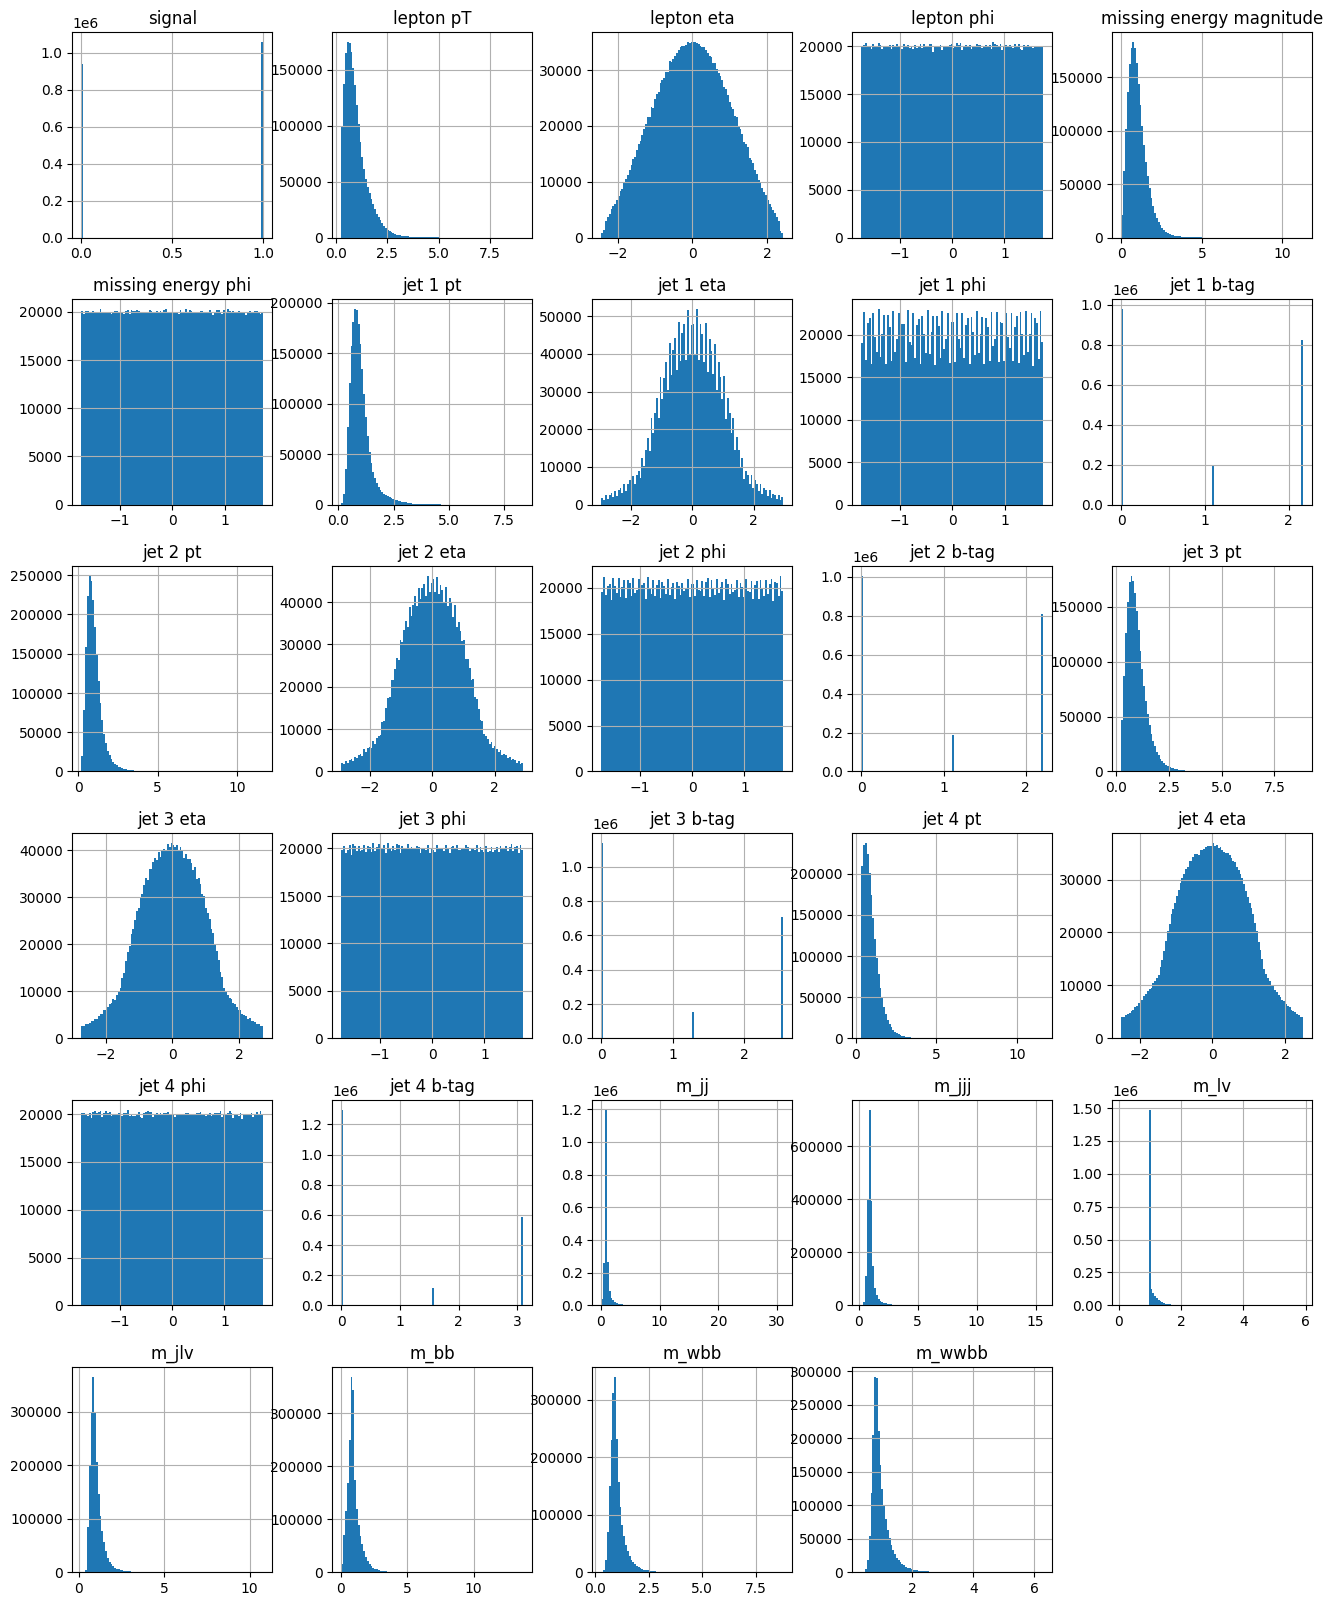

In [39]:
data.hist(figsize=(16, 20), bins=100, xlabelsize=10, ylabelsize=10)

# Correlaciones

In [ ]:
# correlaciones = data.corr()
# f, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(correlaciones)
#plt.savefig('Exploracion/Correlacion.png')

## Análisis

Creamos dos dataframes: uno con los datos donde hay presencia de un boson de Higgs y otro donde no

In [11]:
higgs_true = data[data['signal'] == 1]

In [12]:
higgs_false = data[data['signal'] == 0]

In [13]:
higgs_true.shape

(1058818, 29)

In [14]:
higgs_false.shape

(941182, 29)

#### Promedio de la energía perdida en cada caso

Magnitud de la energía perdida en presencia del Bosón de Higgs:

In [15]:
mean_missing_energy_higgs_true = higgs_true['missing energy magnitude'].mean()
mean_missing_energy_higgs_true

0.9417237939548606

Magnitud de la energía perdida en ausencia del Bosón de Higgs:

In [16]:
mean_missing_energy_higgs_false = higgs_false['missing energy magnitude'].mean()
mean_missing_energy_higgs_false

1.0617247711213003

/tmp/ipykernel_40361/3864501900.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


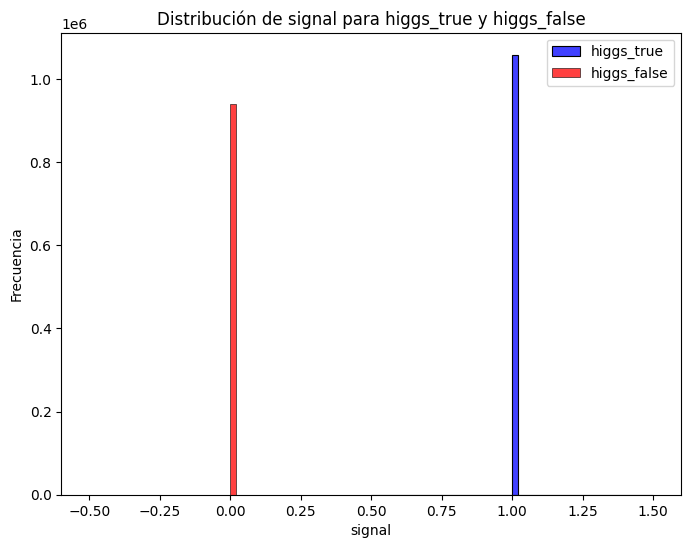

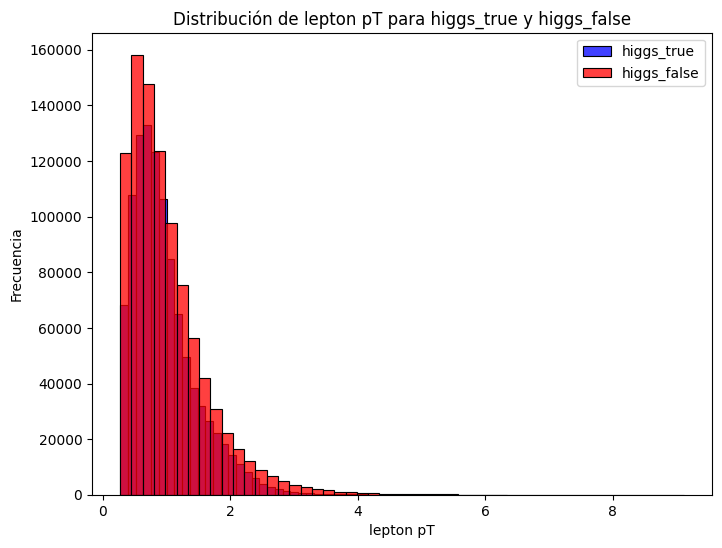

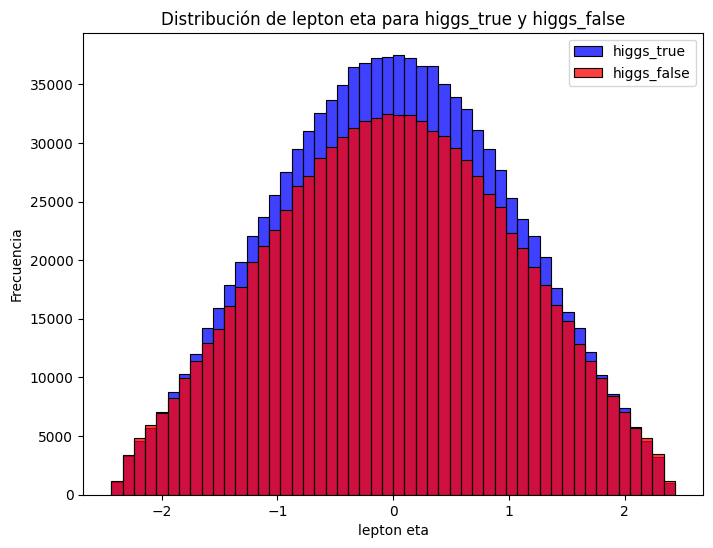

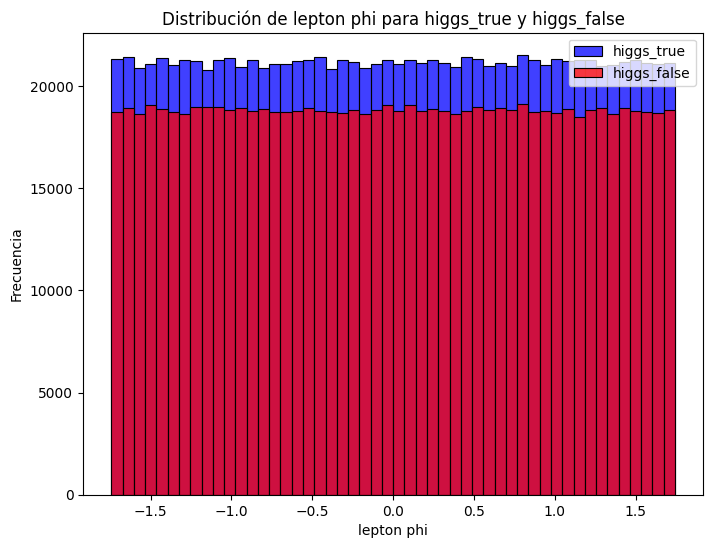

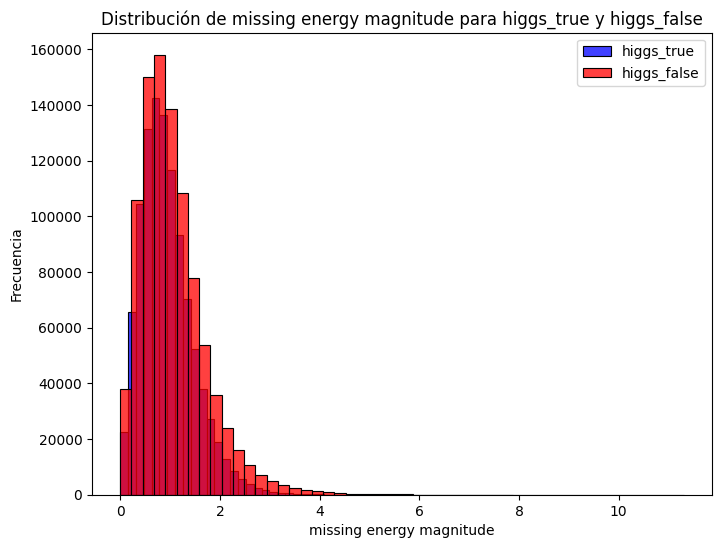

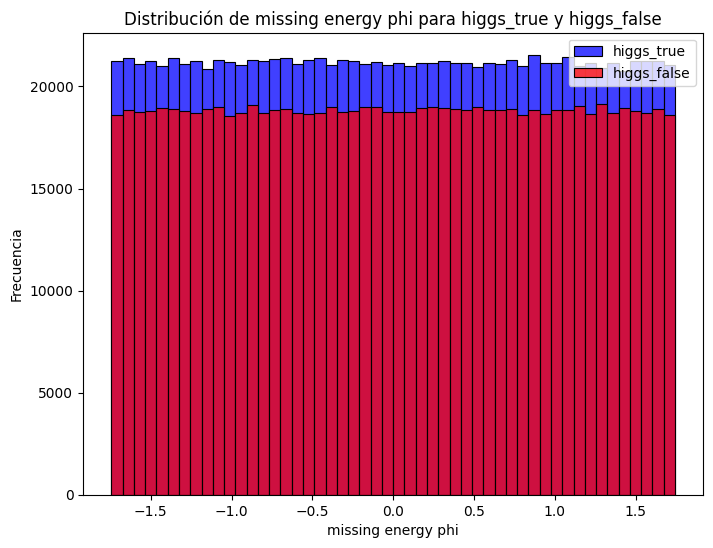

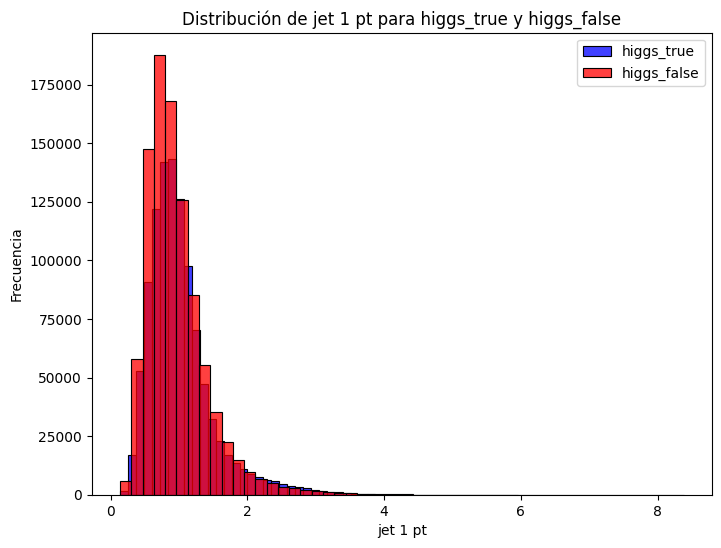

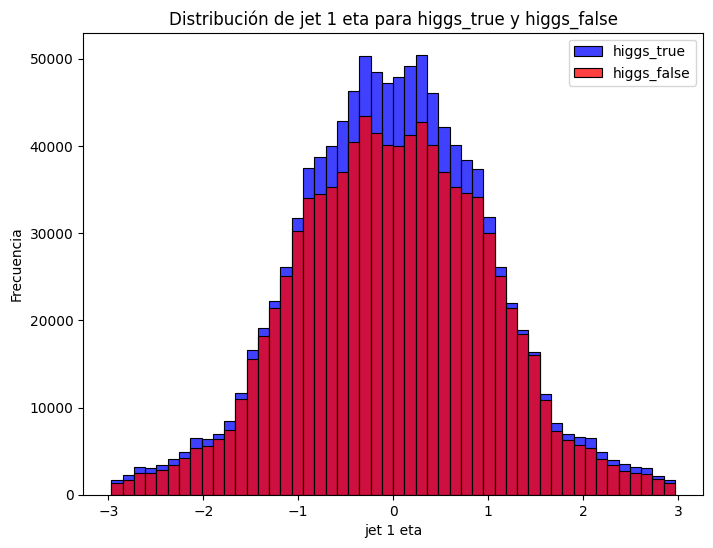

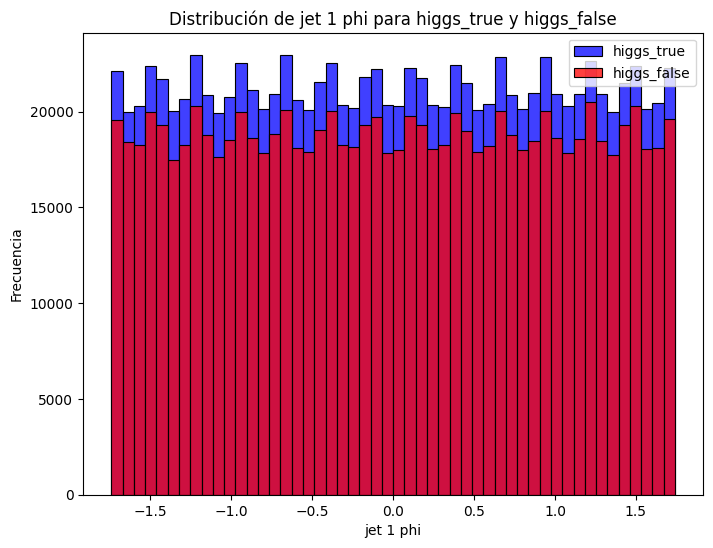

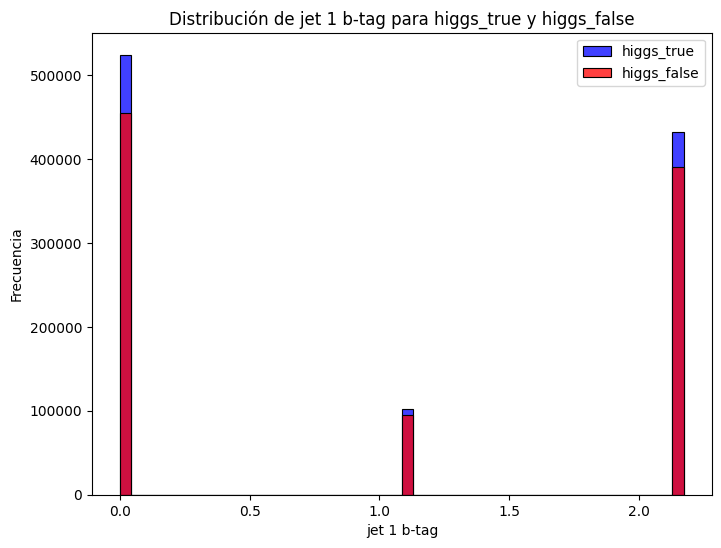

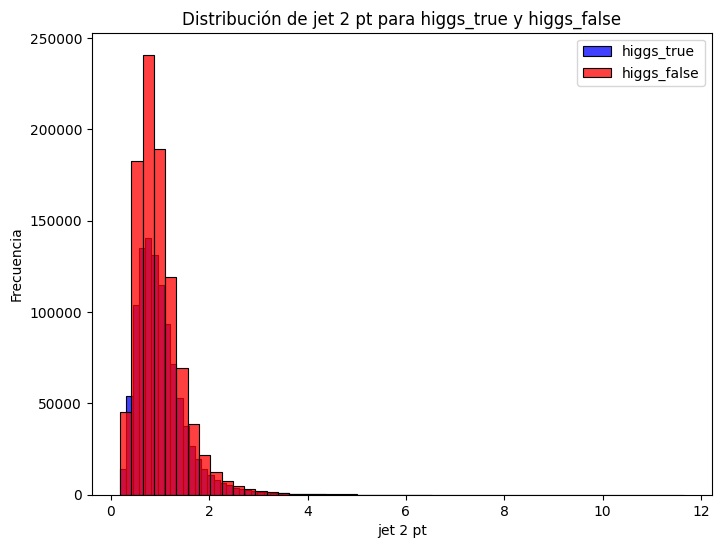

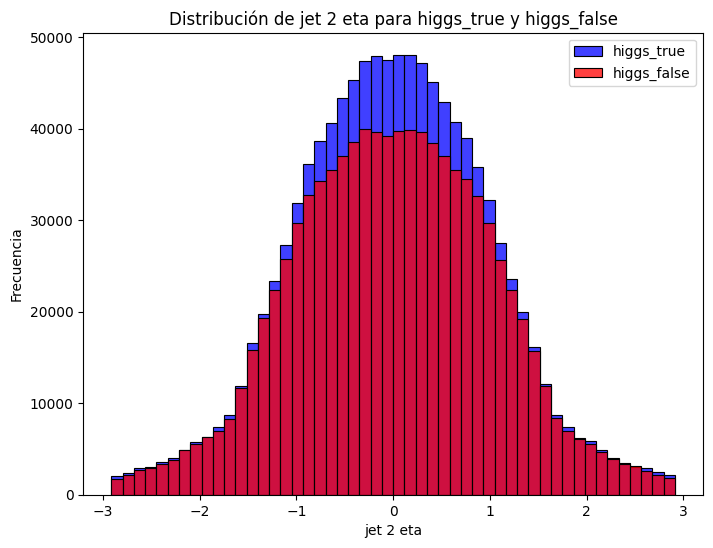

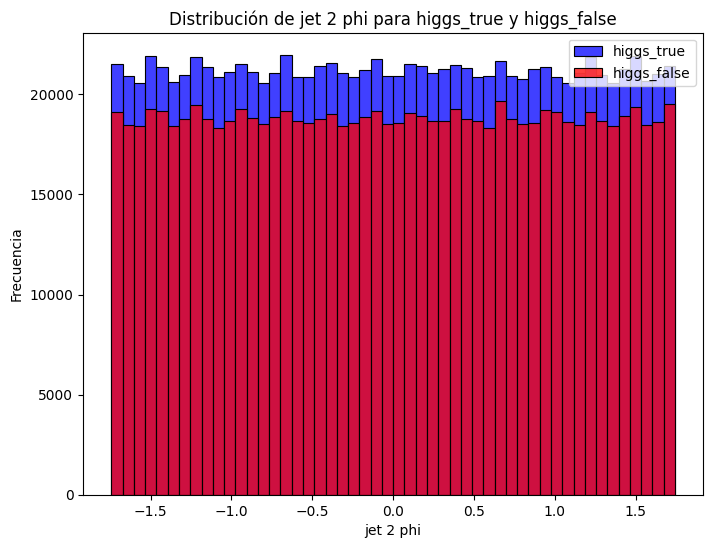

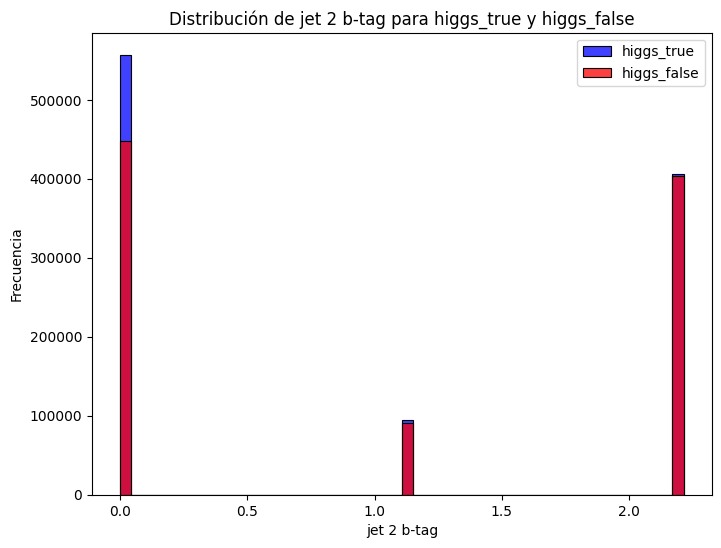

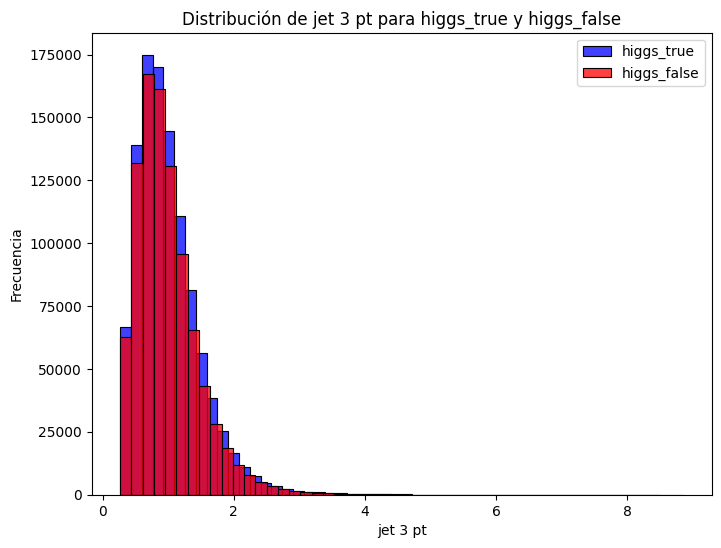

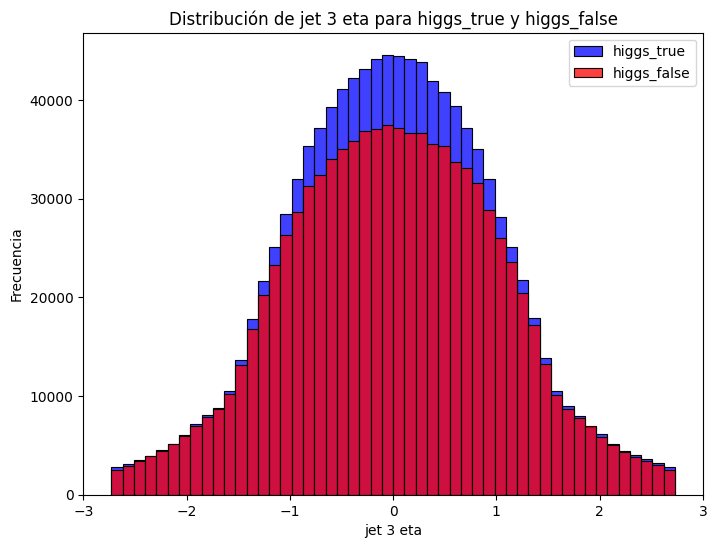

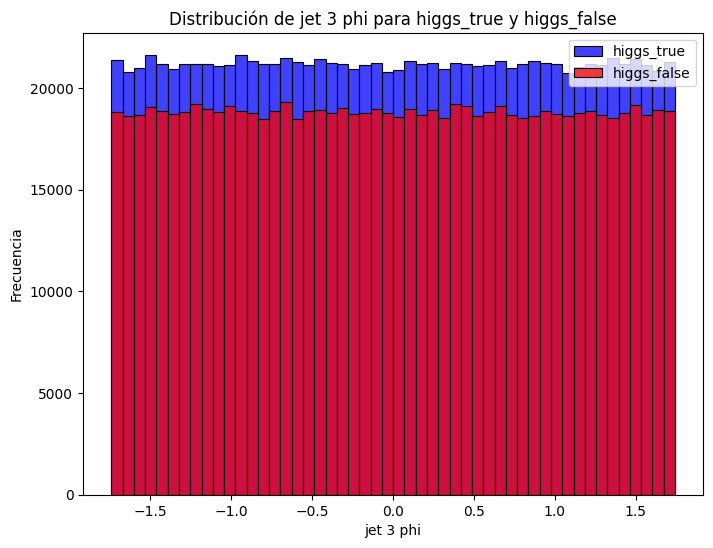

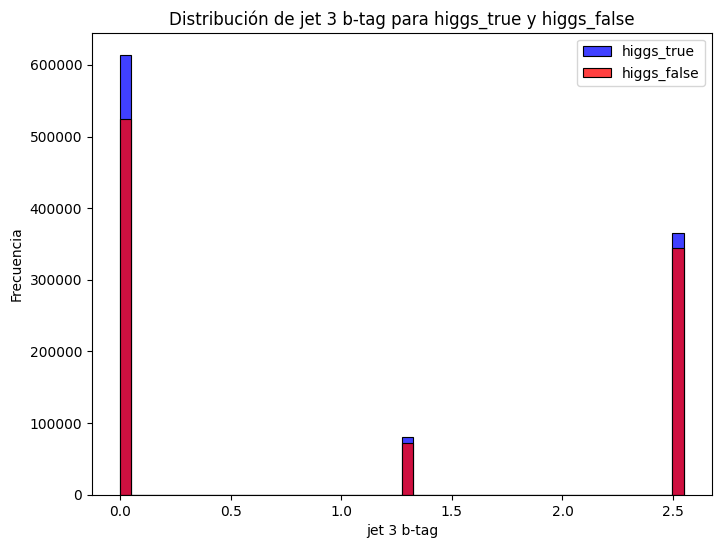

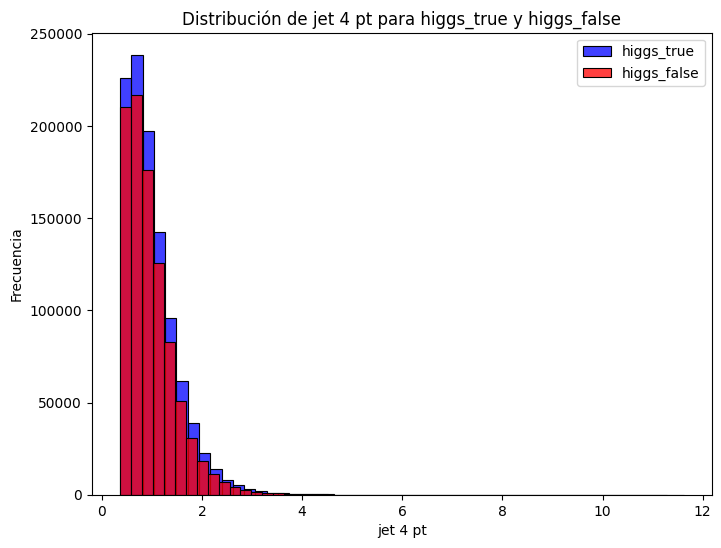

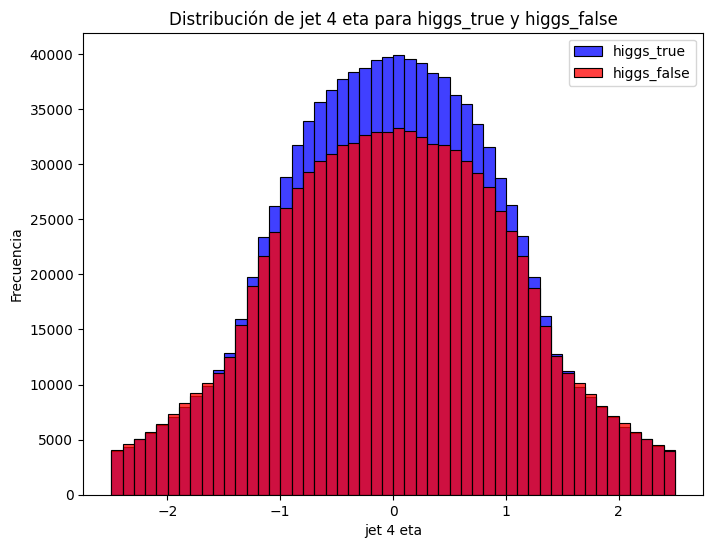

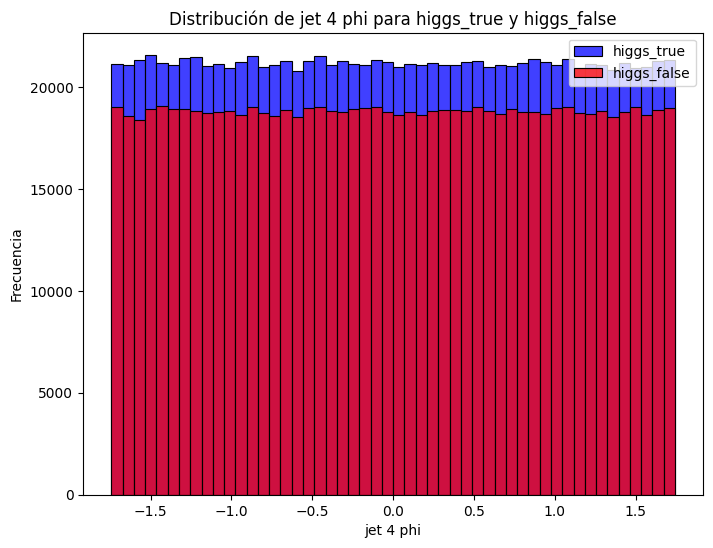

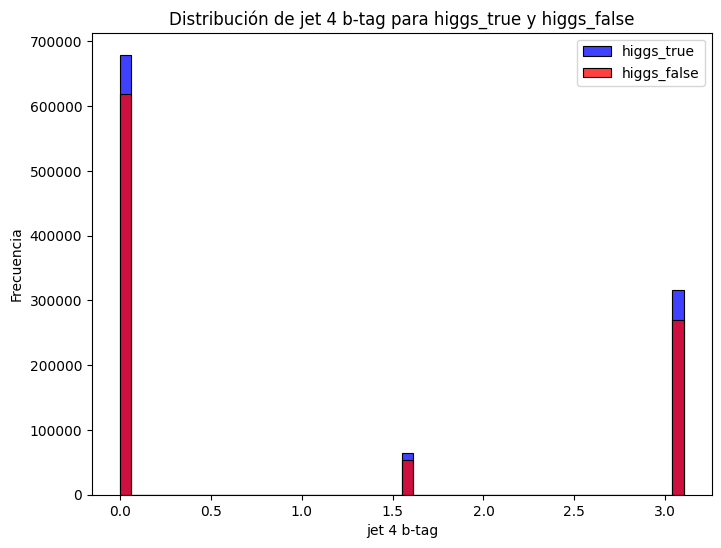

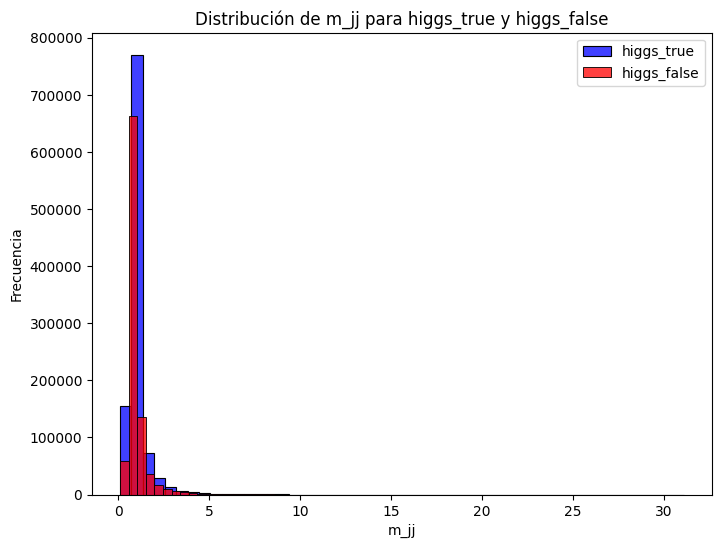

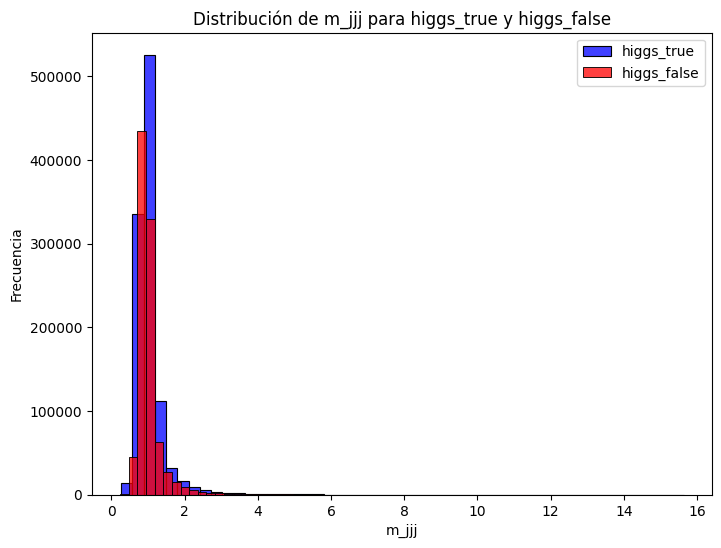

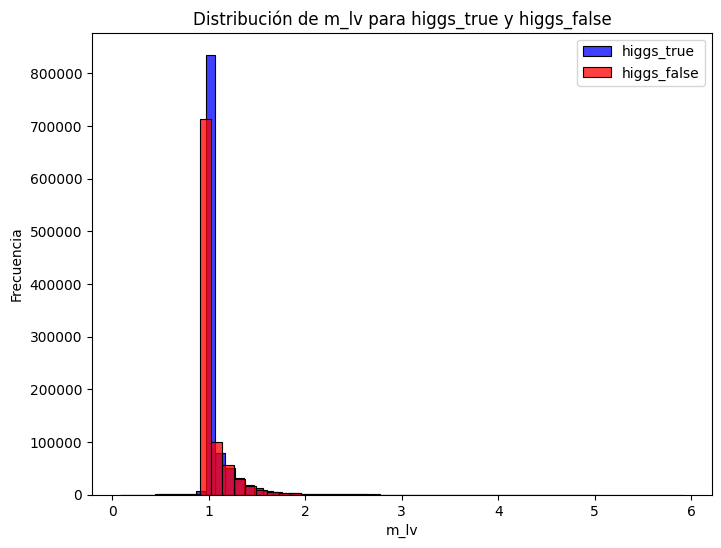

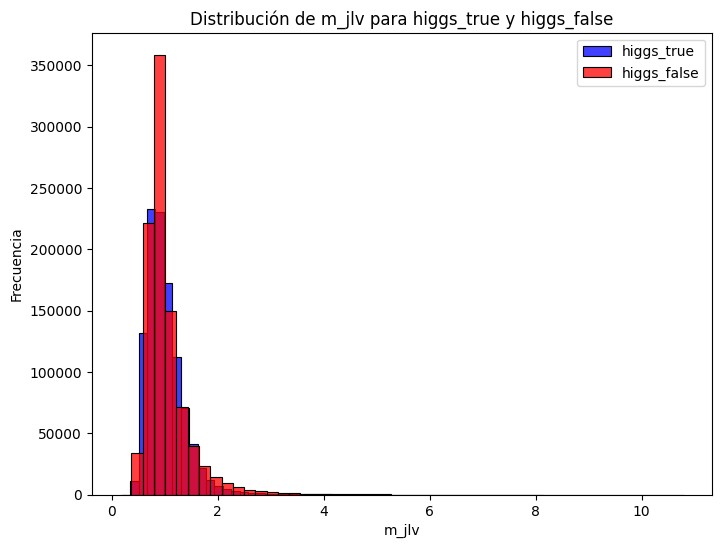

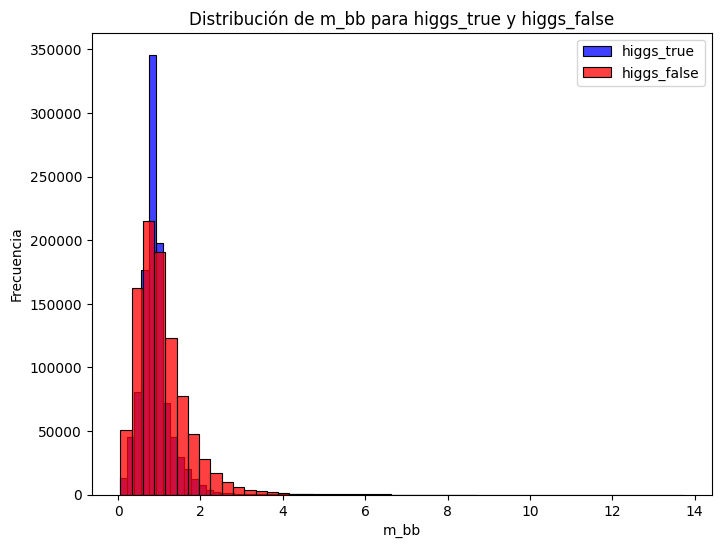

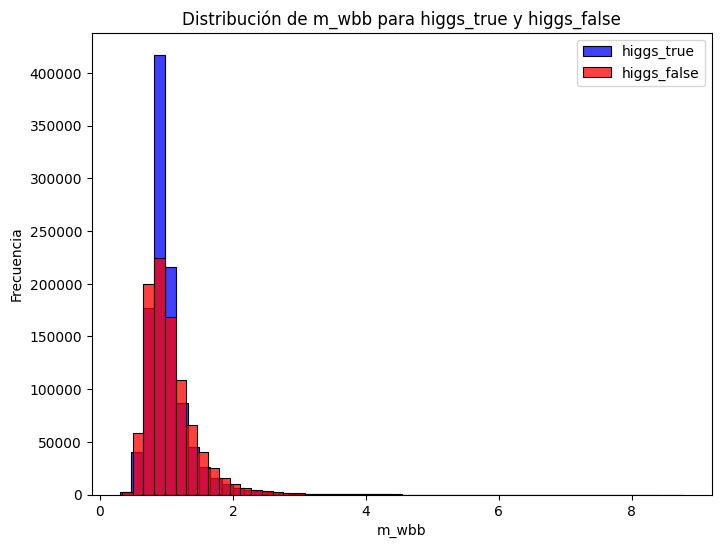

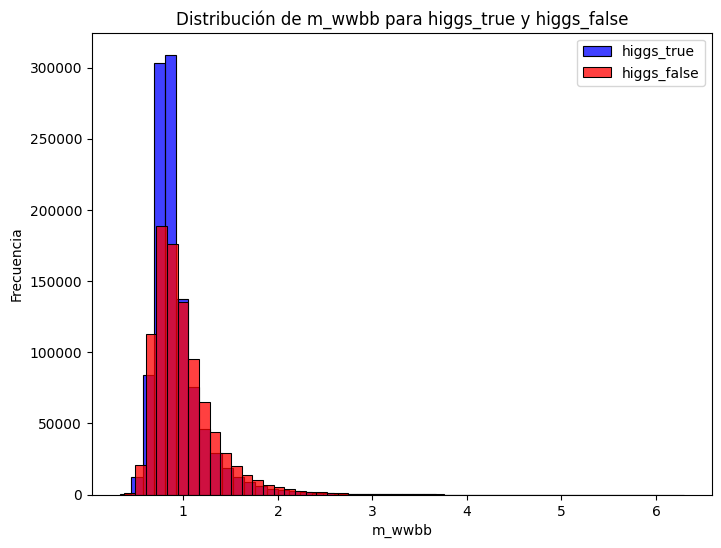

In [27]:
for column_name in new_column_names:
    # Calcular promedio de la columna para higgs_true y higgs_false
    mean_higgs_true = higgs_true[column_name].mean()
    mean_higgs_false = higgs_false[column_name].mean()
    
    # Crear un gráfico para la distribución de la columna para higgs_true y higgs_false
    plt.figure(figsize=(8, 6))
    sns.histplot(data=higgs_true, x=column_name, color='blue', label='higgs_true', bins=50)
    sns.histplot(data=higgs_false, x=column_name, color='red', label='higgs_false', bins=50)
    
    # Añadir etiquetas y título al gráfico
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de {column_name} para higgs_true y higgs_false')
    plt.legend()
    
    # Guardar el gráfico en la carpeta Analisis
    nombre_archivo = f'Analisis_Dist/{column_name}_distribution.png'
    plt.savefig(nombre_archivo)

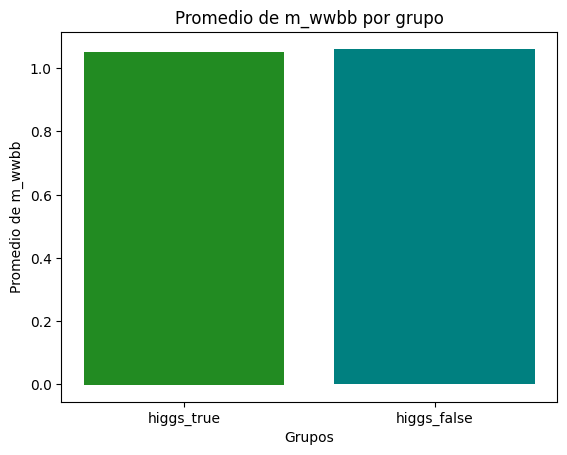

In [28]:
for column_name in new_column_names:
    # Calcular promedio de la columna para higgs_true y higgs_false
    mean_higgs_true = higgs_true[column_name].mean()
    mean_higgs_false = higgs_false[column_name].mean()
    
    # Crear un gráfico para la distribución de la columna para higgs_true y higgs_false
    valores_promedio = [mean_higgs_true, mean_higgs_false]
    nombres_barras = ['higgs_true', 'higgs_false']

    # Crear el gráfico de barras
    plt.bar(nombres_barras, valores_promedio, color=['forestgreen', 'teal'])
    plt.xlabel('Grupos')
    plt.ylabel(f'Promedio de {column_name}')
    plt.title(f'Promedio de {column_name} por grupo')
    
    # Guardar el gráfico en la carpeta Analisis
    nombre_archivo = f'Analisis_Mean/{column_name}_mean.png'
    plt.savefig(nombre_archivo)